<a href="https://colab.research.google.com/github/sjut/DPO_Materials/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F/NER/%20Latest%20commit/food_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Извлечение информации правлами
##Продолжение FOOD
Для извлечения структурированной информации из неструткурированных текстов существуют специальные системы, основанные на правилах.\
Обычно система состоит из:
правила + гезетёры (или газетиры gazetteer)\
*газетеры* - специальные списки - например, списики названий всех организаций, которые должна извлекать система; списки продуктов для извлечения ингредиентов из рецептов и т.п.\
Формально система правил может быть реализована как система конченых преобразователей (Gate), либо как система контекстно-свободных грамматик

[Yargy](https://yargy.readthedocs.io/ru/latest/) — библиотека для извлечения структурированной информации из текстов на русском языке. Правила описываются контекстно-свободными грамматиками и словарями ключевых слов (газетерами).\

Банк готовых правил для имён, дат, адресов и других сущностей доступен в репозитории [Natasha](https://github.com/natasha/natasha).\

#Разбор примера 
https://github.com/natasha/yargy-examples/blob/master/04_food/notes.ipynb


In [1]:
#устанавливаем yargy - Yargy — библиотека для извлечения структурированной информации из текстов на русском языке. Правила описываются контекстно-свободными грамматиками и словарями ключевых слов. 
!pip install yargy
!pip install ipymarkup #Collection of NLP visualizations for NER and syntax tree markup.

     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 7.1MB 8.4MB/s 


In [2]:
#клонируем папку гитхабе yargy - пример про извлечение данных из рецептов приготовления еды 04_food
%cd /content
!git clone https://github.com/natasha/yargy-examples.git
%cd yargy-examples/04_food

/content
Cloning into 'yargy-examples'...
remote: Enumerating objects: 2087, done.
remote: Total 2087 (delta 0), reused 0 (delta 0), pack-reused 2087
Receiving objects: 100% (2087/2087), 6.25 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/yargy-examples/04_food


In [0]:
# Модуль glob находит все пути, совпадающие с заданным шаблоном в соответствии с правилами, используемыми оболочкой Unix.
from glob import glob

# стандартизуем тире,  заменяем (убираем) спецсиволы (неразрывные пробелы, мягкие переносы) и т.п.  

def make_translation(source, target):
    assert len(source) == len(target)
    return {
        ord(a): ord(b)
        for a, b in zip(source, target)
    }


DASHES_TRANSLATION = make_translation(
    '‑–—−',
    '----'
)


def preprocess(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\xad', '')
    text = text.translate(DASHES_TRANSLATION)
    return text

#считываем тексты из папки с текстами (файлы с расширением .txt) и кладем их в список
texts = []
for path in sorted(glob('texts/*.txt')):
    with open(path) as file:
        text = file.read()
        text = preprocess(text)
        texts.append(text)

In [4]:
#проверяем, что записалось в список, сколько текстов считалось
print(texts[0])
len(texts)

Салат с ананасами и курицей 🍍

Ингредиенты:

● Филе куриной грудки 1 шт.
● Шампиньоны 300 г
● Кукуруза консервированная 1 банка
● Сыр 200 г
● Лук репчатый 1 головка
● Чеснок 2 зубчика
● Ананас консервированный 1 банка
● Майонез по вкусу

Приготовление:

1. Обжарить грибы с луком с добавить немного соли. Старайтесь не резать грибы слишком мелко.
2. Отварить куриную грудку без кожи, нарезать кусочками и добавить к ней консервированную кукурузу.
3. Сыр также нарезать маленькими кубиками или натереть на крупной терке. Добавить к курице с кукурузой.
4. Смешать все ингредиенты с консервированным ананасом и заправить салат майонезом с чесноком.

Приятного аппетита!


1000

In [5]:
from random import seed, sample
#случайным образом выбираем тексты и смотрим, как они устроены
seed(40)
for text in sample(texts, 2):
    print(text)
    print('---' * 10)

Мексиканский суп с курицей

Нам потребуется:

Куриная грудка - 1 шт.,
Лук репчатый - 1 шт.,
Красная фасоль консервированная - 1 банка,
Вермишель - 50 г,
Кукуруза замороженная - 100 г,
Укроп - по вкусу,
Соль - по вкусу,
Молотый острый красный перец - по вкусу.

Из куриной грудки сварите бульон, достаньте мясо, отделите от костей и мелко нарежьте.

Лук мелко нашинкуйте. В глубоком сотейнике разогрейте растительное масло и обжарьте лук до прозрачности.

Добавьте к луку курицу и обжаривайте несколько минут. С фасоли слейте жидкость. Переложите фасоль в сотейник, добавьте молотый перец по вкусу, перемешайте и продолжайте обжаривать.

Залейте в сотейник куриный бульон, посолите по вкусу и варите 5 мин. Добавьте вермишель и кукурузу, варите еще 5 минут, затем накройте крышкой и снимите с огня.

Дайте супу настояться. Мелко нарубите укроп. Подавайте суп с укропом и кукурузными чипсами.
------------------------------
Мясной пирог

Ингредиенты:
для теста:
сливочное масло - 1/2 стак
сметана - 1 с

Эвристики: строки с ингредиентами короткие (пусть не больше 50 символов) и содержат числа 

In [0]:
import re

#функция, которая отбирает строки с ингредтиентами
def find_ingredient_sections(text):
    return re.findall(r'ингредиенты:(.+?)приготовление', text, re.I | re.S)

#проверяем длину строки и наличие числа
def maybe_ingredient(line):
    match = re.search(r'\d', line)
    size = len(line) <= 50
    return match and size

lines = []

#в переменную lines (список из строк) записываем только строки длиной меньше 50 символов, содержащих число
for text in texts:
    sections = find_ingredient_sections(text)
    for section in sections:
        for line in section.splitlines():
            if maybe_ingredient(line):
                lines.append(line)

In [7]:
print(lines[0])

● Филе куриной грудки 1 шт.


In [8]:
seed(14)
sample(lines, 20)

['● Оливковое масло - 2 ст. л.',
 'Молоко 1% - 100 г ',
 '- Морковь 2 - 3 шт.',
 'творог - 500 г,',
 '2 яйца,',
 '* 3/4 стакана холодной кипяченой воды',
 '• сыр - 100 г.',
 '1 нарезанный красный перец',
 '230 г кокосового или тростникового сахара ',
 'Яйцо - 3 шт.',
 'Сок лайма - 2 Ст. ложки',
 '● Мука - 100 г.',
 'Сметана - 50 г',
 '● Бананы - 3 шт.',
 'ананасы консервированные - 1 банка ',
 '● Сыр твердый 30 гр.',
 '500 мл растительного масла ',
 '5) соль, растительное масло для пассеровки овощей.',
 '5 средних варёных картофелин ',
 '● 3-5 зубчиков чеснока; ']

#Грамматика
контекстно-свободная грамматика\
правила состоят из предикатов\
импортируем конструктор правил, импортируем предикаты

In [0]:
from IPython.display import display

# pip install ipymarkup
from ipymarkup import show_markup, AsciiMarkup

from yargy import (
    Parser,
    or_, rule
)
from yargy.pipelines import morph_pipeline
from yargy.predicates import (
    eq, in_, dictionary,
    type, gram, normalized
)
from yargy.tokenizer import MorphTokenizer
from yargy import interpretation as interp
from yargy.interpretation import fact, attribute

In [27]:
#смотрим, что возвращает токенайзер
from yargy.tokenizer import MorphTokenizer

TOKENIZER = MorphTokenizer()
print(list(TOKENIZER('столовых')))
#list(TOKENIZER('консервированного'))
#list(TOKENIZER('5 средних варёных картофелин'))
#list(TOKENIZER('3/4 стакана холодной кипяченой воды'))
list(TOKENIZER('2 ст. ложки'))

[MorphToken('столовых', [0, 8), 'RU', [Form('столовый', Grams(ADJF,gent,plur)), Form('столовый', Grams(ADJF,accs,anim,plur)), Form('столовый', Grams(ADJF,loct,plur)), Form('столовая', Grams(NOUN,femn,gent,inan,plur)), Form('столовая', Grams(NOUN,femn,inan,loct,plur))])]


[Token('2', [0, 1), 'INT'),
 MorphToken('ст',
            [2, 4),
            'RU',
            [Form('ст', Grams(Abbr,Fixd,NOUN,femn,inan,nomn,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,femn,gent,inan,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,datv,femn,inan,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,accs,femn,inan,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,ablt,femn,inan,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,femn,inan,loct,sing)),
             Form('ст', Grams(Abbr,Fixd,NOUN,femn,inan,nomn,plur)),
             Form('ст', Grams(Abbr,Fixd,NOUN,femn,gent,inan,plur)),
             Form('ст', Grams(Abbr,Fixd,NOUN,datv,femn,inan,plur)),
             Form('ст', Grams(Abbr,Fixd,NOUN,accs,femn,inan,plur)),
             Form('ст', Grams(Abbr,Fixd,NOUN,ablt,femn,inan,plur)),
             Form('ст', Grams(Abbr,Fixd,NOUN,femn,inan,loct,plur))]),
 Token('.', [4, 5), 'PUNCT'),
 MorphToken('ложки',
            [6, 11),
            'RU',
        

In [66]:
#правило контекстно-свободной грамматики
R = rule('a', 'b')
R.normalized.as_bnf

R0 -> 'a' 'b'


[0,8) - [0 - номер первого символа токена, ) - номер пробела после токена 

In [42]:
line = "2 стакана крупы, 2 кг муки"
Rule = rule(eq("2")) #предикат eq - точное совпадение
parser = Parser(Rule)
matches = parser.findall(line)
spans = [_.span for _ in matches] #выдает позиции найденных спанов
print(spans)
show_markup(line, spans) # на вход принимает текст и список спанов, подсвечивает спаны

[[0, 1), [17, 18)]


BoxMarkup('2 стакана крупы, 2 кг муки', [Span(0, 1, None), Span(17, 18, None)])

[[0, 11), [19, 23)]


BoxMarkup('10 стаканов крупы, 2 кг муки',
          [Span(0, 11, None), Span(19, 23, None)])

Match([Token('10', [0, 2), 'INT'), MorphToken('стаканов', [3, 11), 'RU', [Form('стакан', Grams(NOUN,gent,inan,masc,plur))])], [0, 11))


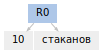

In [122]:
line = "10 стаканов крупы, 2 кг муки"
INT = type('INT') #создадим предикат - предикат принимает название типа
NOUN = gram('NOUN')
Rule = rule(INT, NOUN)
parser = Parser(Rule)
matches = parser.findall(line)
spans = [_.span for _ in matches] #выдает позиции найденных спанов
print(spans)
show_markup(line, spans) # на вход принимает текст и список спанов, подсвечивает спаны
#результат работы парсера - дерево разбора
match = list(parser.findall(line))
print(match[0])
match[0].tree.as_dot

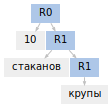

In [120]:
line3 = "10 стаканов крупы"
#INT = type('INT') #создадим предикат - предикат принимает название типа
INT = eq("10")
NOUN = gram('NOUN').repeatable()
Rule1 = rule(INT, NOUN)
parser4 = Parser(Rule1)
match = parser4.match(line3)
match.tree.as_dot

In [126]:
#собираем факт
#структурированное представление: для этого существует система интепретации
#создаем объект Measure
Measure = fact(
    'Measure',
    ['amount', 'unit']
)
#указываем, что Amount нужно положить в поле 'amount'
Amount = INT.interpretation(
    Measure.amount
#.custom(int)
)
Unit = NOUN.interpretation(
    Measure.unit
#.normalized()
)
Measure_tr = rule(Amount, Unit).interpretation(Measure)
parser1 = Parser(Measure_tr)
#результат работы парсера - дерево разбора
match = parser1.find(line)
print(match)
match.tree.as_dot
match.fact

Match([Token('10', [0, 2), 'INT'), MorphToken('стаканов', [3, 11), 'RU', [Form('стакан', Grams(NOUN,gent,inan,masc,plur))]), MorphToken('крупы', [12, 17), 'RU', [Form('крупа', Grams(NOUN,femn,gent,inan,sing)), Form('круп', Grams(NOUN,inan,masc,nomn,plur)), Form('круп', Grams(NOUN,accs,inan,masc,plur)), Form('крупа', Grams(NOUN,femn,inan,nomn,plur)), Form('крупа', Grams(NOUN,accs,femn,inan,plur))])], [0, 17))


Measure(amount='10',
        unit='стаканов крупы')

In [144]:
#правило, которому можно передать список строк morph_pipeline
Unit1 = morph_pipeline([
      'ст.л',
      'ст.ложка',
      'г',
      'гр',
      'шт',
      'столовая ложка',
      'ч.л.',
      'грамм',
      'стакан'
      ]
)
Amount1 = INT
Measure1 = rule(Amount1, Unit1)
parser2 = Parser(Measure1)
line1 = "5 ст.л. муки, 10 г муки, 5 шт помидор"
match = list(parser2.findall(line1))
spans1 = [_.span for _ in match]
show_markup(line1, spans1)
print(match[2])

BoxMarkup('5 ст.л. муки, 10 г муки, 5 шт помидор',
          [Span(0, 6, None), Span(14, 18, None), Span(25, 29, None)])

Match([Token('5', [25, 26), 'INT'), MorphToken('шт', [27, 29), 'RU', [Form('шт', Grams(UNKN))])], [25, 29))


Measure(amount='10', unit='стаканов')


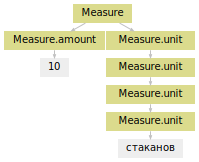

In [148]:
Measure_f = fact(
    'Measure',
    ['amount', 'unit']
)
#указываем, что Amount нужно положить в поле 'amount'
Amount1 = INT.interpretation(
    Measure_f.amount
#.custom(int)
)
Unit1 = Unit1.interpretation(
    Measure_f.unit)
Measure_tr1 = rule(Amount1, Unit1).interpretation(Measure_f)
parser3 = Parser(Measure_tr1)
match = parser3.find(line)
print(match.fact)
match.tree.as_dot

In [0]:
seed(14)
lines = sample(lines, 50)

In [0]:
def show_matches(rule, *lines):
    matches_list = []
    parser = Parser(rule) #инициализируем Parser
    for line in lines:
        matches = parser.findall(line) #у парсера есть несколько методов, findall - возвращает список matches
        matches = sorted(matches, key=lambda _: _.span)
        spans = [_.span for _ in matches]
        show_markup(line, spans)
        if matches:
            facts = [_.fact for _ in matches]
            if len(facts) == 1:
                facts = facts[0]
            display(facts)
            matches_list += matches
    return matches_list


INT = type('INT')
NOUN = gram('NOUN')
ADJF = gram('ADJF')
PRTF = gram('PRTF')
GENT = gram('gent')
DOT = eq('.')

TOKENIZER = MorphTokenizer()

##Spoon
В прошлый раз мы все строили постепенно, чтобы посмотреть, как работают отдельные фунции, предикаты и факты\
Теперь будет более системно строить парсер
(1) для начала исчислим все варианты меры "ложка"


BoxMarkup('2 Ст. ложки', [Span(2, 11, None)])

Spoon(type='столовая')

BoxMarkup('3 чайных л', [Span(2, 10, None)])

Spoon(type='чайная')

BoxMarkup('● Оливковое масло - 2 ст. л.', [Span(22, 28, None)])

Spoon(type='столовая')

BoxMarkup('Молоко 1% - 100 г ', [])

BoxMarkup('- Морковь 2 - 3 шт.', [])

BoxMarkup('творог - 500 г,', [])

BoxMarkup('2 яйца,', [])

BoxMarkup('* 3/4 стакана холодной кипяченой воды', [])

BoxMarkup('• сыр - 100 г.', [])

BoxMarkup('1 нарезанный красный перец', [])

BoxMarkup('230 г кокосового или тростникового сахара ', [])

BoxMarkup('Яйцо - 3 шт.', [])

BoxMarkup('Сок лайма - 2 Ст. ложки', [Span(14, 23, None)])

Spoon(type='столовая')

BoxMarkup('● Мука - 100 г.', [])

BoxMarkup('Сметана - 50 г', [])

BoxMarkup('● Бананы - 3 шт.', [])

BoxMarkup('ананасы консервированные - 1 банка ', [])

BoxMarkup('● Сыр твердый 30 гр.', [])

BoxMarkup('500 мл растительного масла ', [])

BoxMarkup('5) соль, растительное масло для пассеровки овощей.', [])

BoxMarkup('5 средних варёных картофелин ', [])

BoxMarkup('● 3-5 зубчиков чеснока; ', [])

BoxMarkup('1 стакан льда ', [])

BoxMarkup('-900 гр филе куриной грудки грудки', [])

BoxMarkup('Тыква - 1 кг', [])

BoxMarkup('- 400 г ягод (замороженные или свежие)', [])

BoxMarkup('35 г сахара ', [])

BoxMarkup('Лук - 1 Штука', [])

BoxMarkup('🔹 Картофель - 600-700 г', [])

BoxMarkup('● 2-3 зубчика чеснока, ', [])

BoxMarkup('• Куриная грудка 500гр.', [])

BoxMarkup('Кабачок-300 гр.', [])

BoxMarkup('Сахар коричневый - 2 ч. л. ', [Span(21, 26, None)])

Spoon(type='чайная')

BoxMarkup('помидоры - 2-3 шт.', [])

BoxMarkup('Сыр твердый - 70-100 Грамм', [])

BoxMarkup('● маргарин - 100гр;', [])

BoxMarkup('изюм 10 г, ', [])

BoxMarkup('Шоколад 55-70% какао - 460 г', [])

BoxMarkup('Сливочное масло - 300 г ', [])

BoxMarkup('● 2 луковицы, ', [])

BoxMarkup('1 сладкий красный перец', [])

BoxMarkup('- 2 ст. л сахара ', [Span(4, 9, None)])

Spoon(type='столовая')

BoxMarkup('- сгущенное молоко для крема 0.5 банки ', [])

BoxMarkup('Печень куринная - 700 г ', [])

BoxMarkup('-Масло сливочное - 75-150 г', [])

BoxMarkup('300 мл жирных сливок (от 40 %)', [])

BoxMarkup('● Мука - 1 ст. ', [])

BoxMarkup('Чеснок: 2-4 Зубчиков,', [])

BoxMarkup('1 банка сгущенного молока,', [])

BoxMarkup('● Виноград - 150 граммов', [])

BoxMarkup('Сахар-песок - 7 ст. л. ', [Span(16, 22, None)])

Spoon(type='столовая')

BoxMarkup('майонез - 3 ст. ложки', [Span(12, 21, None)])

Spoon(type='столовая')

6


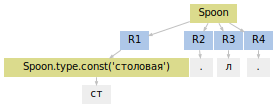

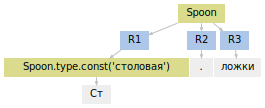

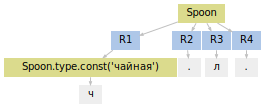

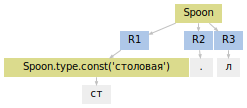

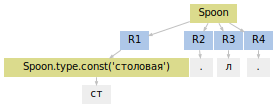

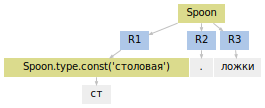

In [182]:
Spoon = fact(
    'Spoon',
    ['type']
)



#Unit

In [0]:
from yargy.utils import Record

Unit = fact(
    'Unit',
    ['type', 'modifier']
)

class Synonyms(Record):
    __attributes__ = ['name', 'synonyms']
    
    def __init__(self, name, synonyms=()):
        self.name = name
        self.synonyms = synonyms

NAMES = [
    Synonyms('банка', ['бан']),
    Synonyms('грамм', ['г', 'гр']),
    Synonyms('горсть'),
    Synonyms('зубчик'),
    Synonyms('килограмм', ['кг']),
    Synonyms('литр', ['л']),
    Synonyms('миллиграмм', ['мг']),
    Synonyms('миллилитр', ['мл']),
    Synonyms('пакетик'),
    Synonyms('полоска'),
    Synonyms('пучок', ['пуч']),
    Synonyms('сантиметр', ['см']),
    Synonyms('стакан', ['чашка', 'стак', 'ст']),
    Synonyms('стебель'),
    Synonyms('упаковка', ['уп', 'пачка']),
    Synonyms('штука', ['шт']),
    Synonyms('щепотка'),
]

names = []
mapping = {}
for record in NAMES:
    name = record.name
    names.append(name)
    mapping[name] = name
    for synonym in record.synonyms:
        names.append(synonym)
        mapping[synonym] = name


NAME = morph_pipeline(names).interpretation(
    Unit.type.normalized().custom(mapping.get)
)

NAME = rule(
    NAME,
    DOT.optional()
)

MODIFIER = morph_pipeline([
    'маленький',
    'большой',
    'неполный',
    'средний',
    'средне большой',
]).interpretation(
    Unit.modifier.normalized()
)

UNIT = rule(
    MODIFIER.optional(),
    or_(
        NAME,
        SPOON.interpretation(
            Unit.type
        )
    )
).interpretation(
    Unit
)


show_matches(
    UNIT,
    '1 стак.',
    '1/2 небольшой чайной ложки',
    'по 1 килограмму',
    'штука',
    'ложечку',
    'огромная упаковка'
)

и т.д. см. https://github.com/natasha/yargy-examples/blob/master/04_food/notes.ipynb

## Немного о грамматиках
KEY -> р. | размер
VALUE -> S | M | L
SIZE -> KEY VALUE


In [183]:
KEY = or_(
    rule('р', '.'),
    rule('размер')
).named('KEY')
VALUE = or_(
    rule('S'),
    rule('M'),
    rule('L'),
).named('VALUE')
SIZE = rule(
    KEY,
    VALUE
).named('SIZE')
SIZE.normalized.as_bnf

SIZE -> KEY VALUE
KEY -> 'р' '.' | 'размер'
VALUE -> 'S' | 'M' | 'L'


Рекурсия
EXPR -> a | ( EXPR + EXPR )\
В Питоне нельзя использовать, переменные, которые ещё не объявлены. \
Для создания рекурсивных правил, в DSL есть специальная конструкция forward:


In [184]:
from yargy import forward

EXPR = forward()
EXPR.define(or_(
    rule('a'),
    rule('(', EXPR, '+', EXPR, ')')
).named('EXPR'))
EXPR.normalized.as_bnf

EXPR -> 'a' | '(' EXPR '+' EXPR ')'


In [185]:
from yargy import not_
from yargy.predicates import eq


WORD = not_(eq('»'))
TEXT = forward()
TEXT.define(or_(
    rule(WORD),
    rule(WORD, TEXT)
))
TITLE = rule(
    '«',
    TEXT,
    '»'
).named('TITLE')
TITLE.normalized.as_bnf

TITLE -> '«' R0 '»'
R0 -> not_('»') | not_('»') R0
